In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np

import matplotlib.pyplot as plt

In [2]:
mnist = keras.datasets.mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
a = layers.Flatten(input_shape=(28,28))
b = layers.Dense(128, activation='relu')
c = layers.Dropout(0.2)
d = layers.Dense(10)


model = keras.Sequential([a, b, c, d])

In [5]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [6]:
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.04175594, -0.17042613,  0.78173363,  0.04533821, -0.13946459,
        -0.41849405, -0.00275131,  0.255159  , -0.39856747,  0.3069398 ]],
      dtype=float32)

In [7]:
tf.nn.softmax(predictions).numpy()

array([[0.0950975 , 0.07691652, 0.19931379, 0.09543878, 0.07933522,
        0.06001849, 0.09095778, 0.11771964, 0.06122645, 0.12397582]],
      dtype=float32)

In [8]:
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [9]:
loss_fn(y_train[:1], predictions).numpy()

2.8131027

In [10]:
model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

In [11]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2955 - accuracy: 0.9156
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1434 - accuracy: 0.9575
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1066 - accuracy: 0.9674
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0882 - accuracy: 0.9731
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0727 - accuracy: 0.9772


In [12]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - loss: 0.0772 - accuracy: 0.9756


[0.0772373229265213, 0.975600004196167]

In [13]:
probability_model = keras.Sequential([
    model,
    keras.layers.Softmax()
])

In [14]:
result = probability_model(x_test[:5]).numpy()

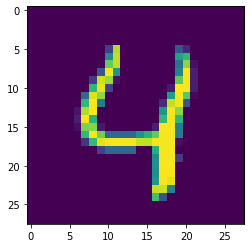

In [15]:
plt.imshow(x_test[4])

In [16]:
np.apply_along_axis(max, 1, result).reshape((5,1)) == result

array([[False, False, False, False, False, False, False,  True, False,
        False],
       [False, False,  True, False, False, False, False, False, False,
        False],
       [False,  True, False, False, False, False, False, False, False,
        False],
       [ True, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False,  True, False, False, False, False,
        False]])

AttributeError: module 'tensorflow' has no attribute 'lay'